In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("/kaggle/input/depression-and-anxiety-data/depression_anxiety_data.csv")

# Check for duplicates and remove them
data = data.drop_duplicates()

print("Cleaned Dataset:")
data.head()

Cleaned Dataset:


,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [2]:
# Check for missing values
print("Missing Values per Column:")
print(data.isnull().sum())

# Fill missing values with the median (for numerical columns) or mode (for categorical columns)
for col in data.columns:
    if data[col].dtype == "object":  # Categorical columns
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numerical columns
        data[col].fillna(data[col].median(), inplace=True)

print("\nDataset after handling missing values:")
print(data.isnull().sum())

Missing Values per Column:
id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

Dataset after handling missing values:
id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_tr

<ipython-input-2-12c00e19ed1d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-2-12c00e19ed1d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

# Exploratory Data Analysis


### Step 1: Understand the Target Variables

The target variables in this dataset are:

    Depression Severity (depression_severity)
    Anxiety Severity (anxiety_severity)

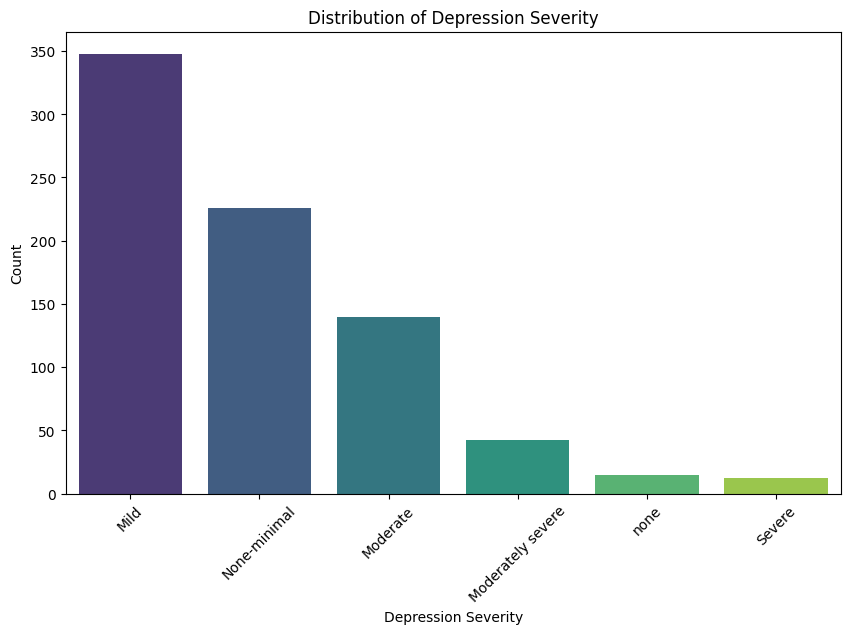

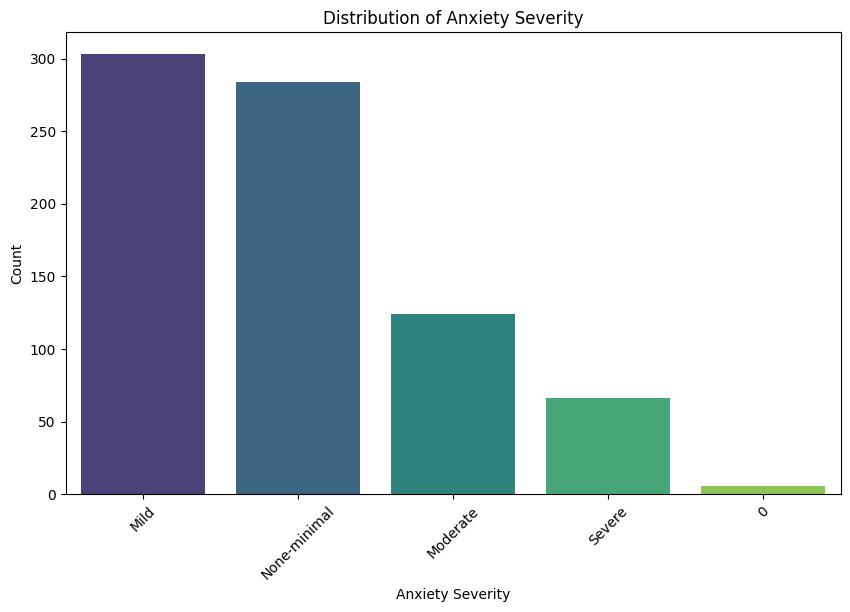

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of Depression Severity
plt.figure(figsize=(10, 6))
sns.countplot(x="depression_severity", data=data, palette="viridis", order=data["depression_severity"].value_counts().index)
plt.title("Distribution of Depression Severity")
plt.xlabel("Depression Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Distribution of Anxiety Severity
plt.figure(figsize=(10, 6))
sns.countplot(x="anxiety_severity", data=data, palette="viridis", order=data["anxiety_severity"].value_counts().index)
plt.title("Distribution of Anxiety Severity")
plt.xlabel("Anxiety Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Step 2: Analyze Demographics
Analysing demographic features like age, gender, and BMI


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


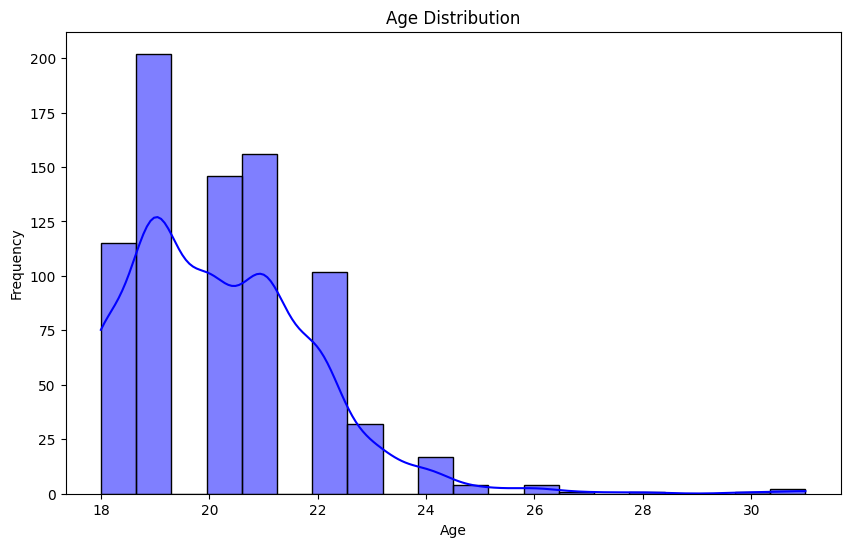

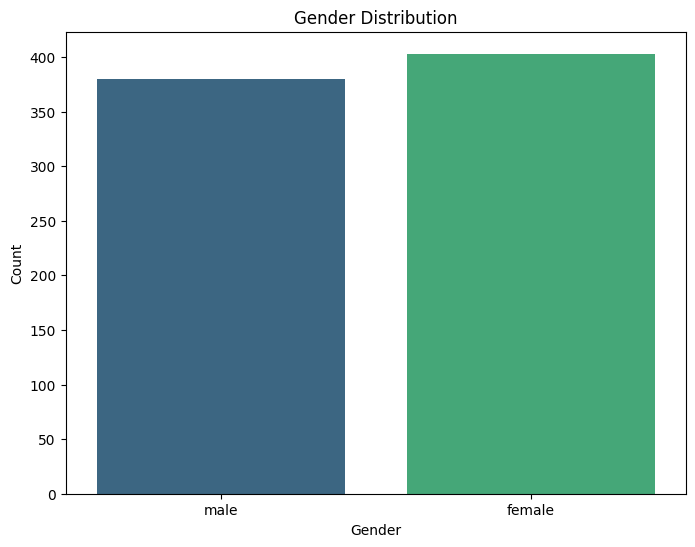

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


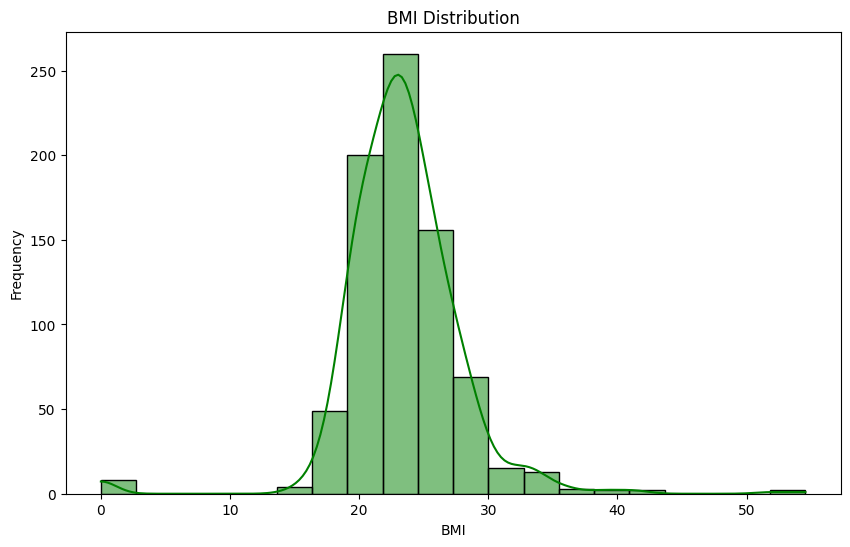

In [4]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="gender", data=data, palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["bmi"], bins=20, kde=True, color="green")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

### Step 3: Explore Mental Health Scores
Analyzing the PHQ-9 (depression) and GAD-7 (anxiety) scores.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


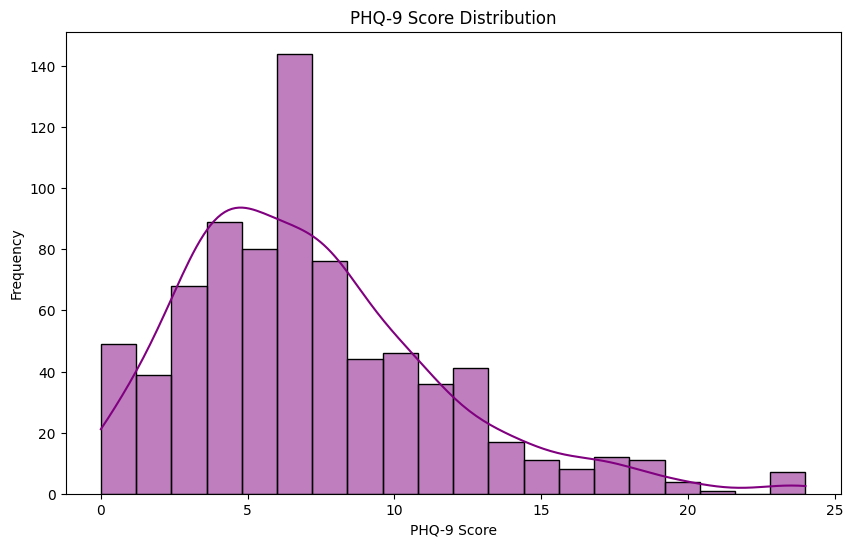

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


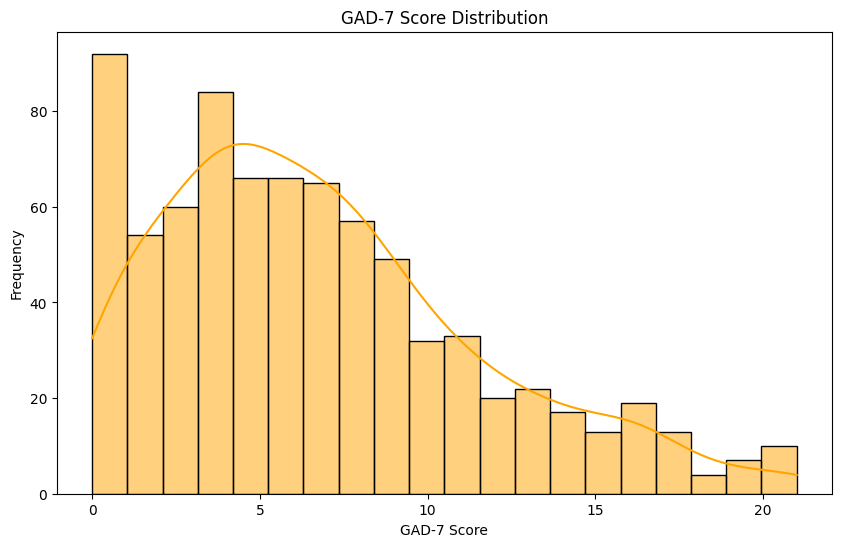

In [5]:
# PHQ-9 score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["phq_score"], bins=20, kde=True, color="purple")
plt.title("PHQ-9 Score Distribution")
plt.xlabel("PHQ-9 Score")
plt.ylabel("Frequency")
plt.show()

# GAD-7 score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["gad_score"], bins=20, kde=True, color="orange")
plt.title("GAD-7 Score Distribution")
plt.xlabel("GAD-7 Score")
plt.ylabel("Frequency")
plt.show()

### Step 4: Grouped Analysis
Analyzing how mental health scores vary across different groups (e.g., gender, BMI categories).


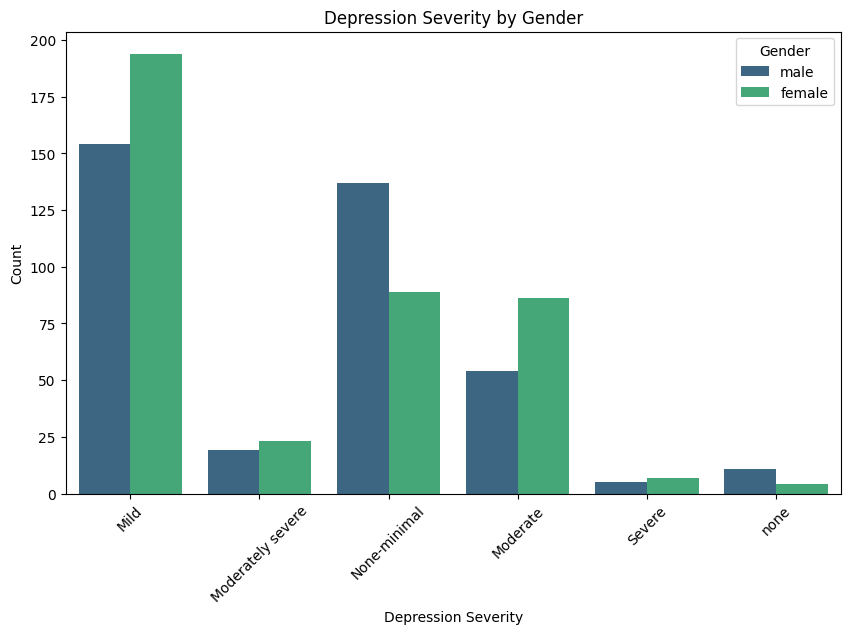

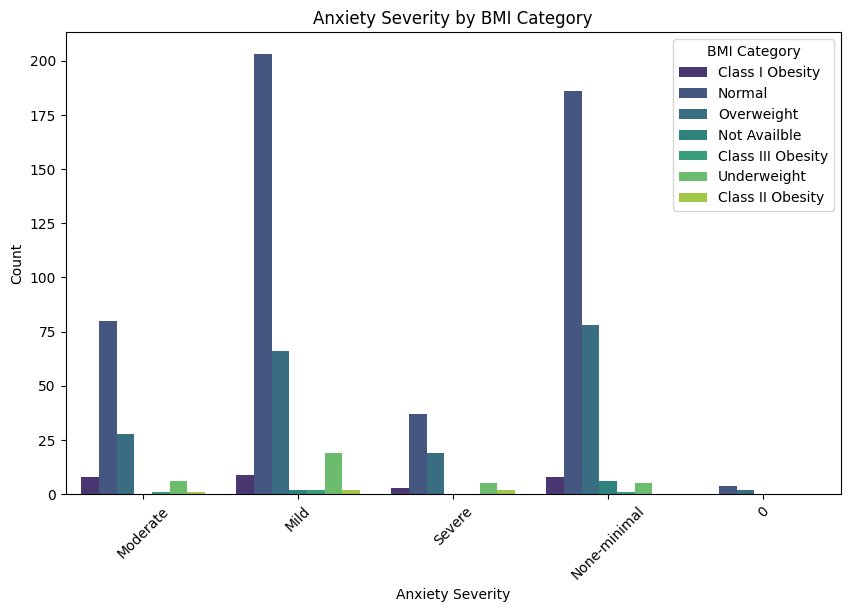

In [6]:
# Depression severity by gender
plt.figure(figsize=(10, 6))
sns.countplot(x="depression_severity", hue="gender", data=data, palette="viridis")
plt.title("Depression Severity by Gender")
plt.xlabel("Depression Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

# Anxiety severity by BMI category
plt.figure(figsize=(10, 6))
sns.countplot(x="anxiety_severity", hue="who_bmi", data=data, palette="viridis")
plt.title("Anxiety Severity by BMI Category")
plt.xlabel("Anxiety Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="BMI Category")
plt.show()

### Step 5: Treatment Analysis
Analyzing how many individuals are receiving treatment for depression or anxiety.

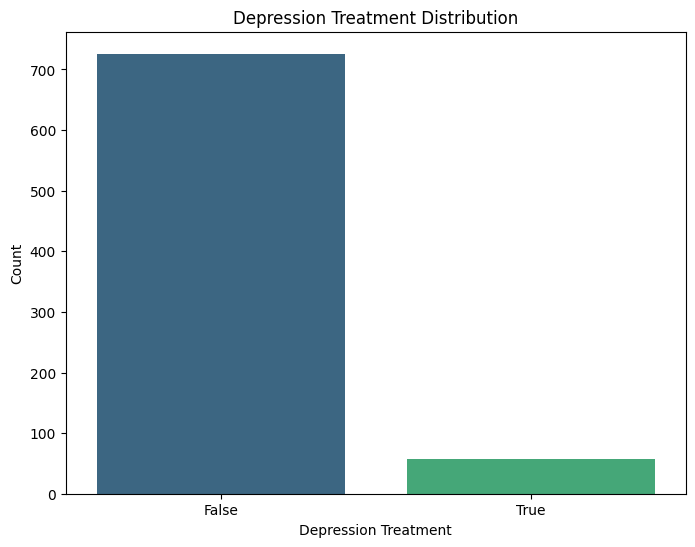

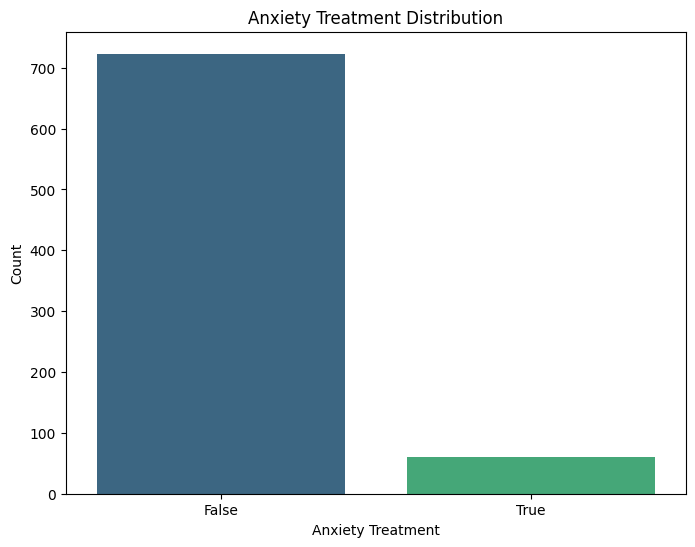

In [7]:
# Depression treatment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="depression_treatment", data=data, palette="viridis")
plt.title("Depression Treatment Distribution")
plt.xlabel("Depression Treatment")
plt.ylabel("Count")
plt.show()

# Anxiety treatment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="anxiety_treatment", data=data, palette="viridis")
plt.title("Anxiety Treatment Distribution")
plt.xlabel("Anxiety Treatment")
plt.ylabel("Count")
plt.show()

### Step 6: Sleepiness Analysis
Analyzing the epworth_score (sleepiness score) and its relationship with mental health.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


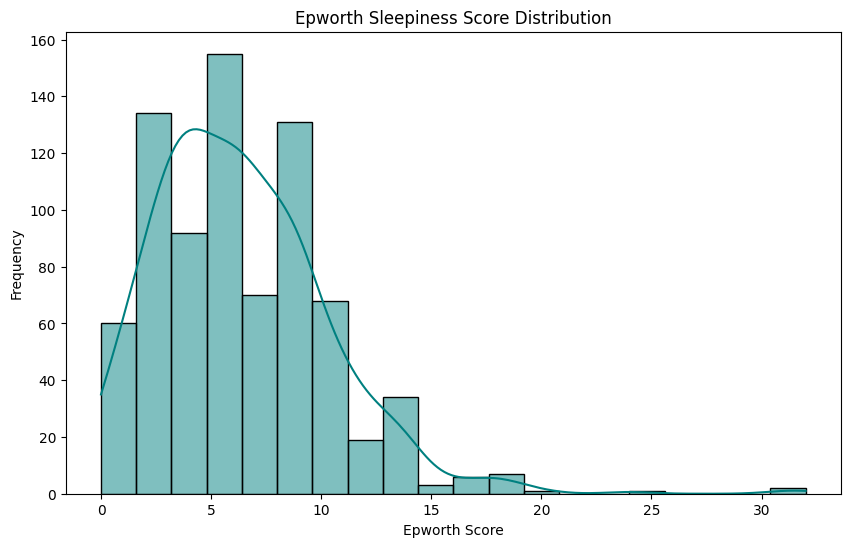

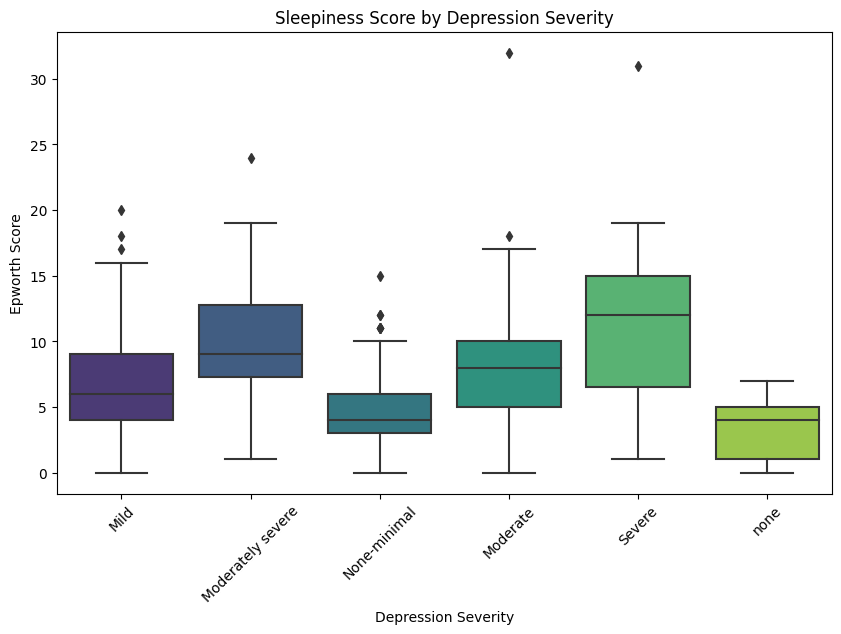

In [8]:
# Sleepiness score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["epworth_score"], bins=20, kde=True, color="teal")
plt.title("Epworth Sleepiness Score Distribution")
plt.xlabel("Epworth Score")
plt.ylabel("Frequency")
plt.show()

# Sleepiness vs Depression Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x="depression_severity", y="epworth_score", data=data, palette="viridis")
plt.title("Sleepiness Score by Depression Severity")
plt.xlabel("Depression Severity")
plt.ylabel("Epworth Score")
plt.xticks(rotation=45)
plt.show()

# Feature Selection & Engineering
### Encoding Categorical Variables
Encode categorical variables like gender, who_bmi, and depression_severity using Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

# Normalize categorical symptom columns (if any)
label_encoders = {}
for col in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders for later use

print("\nDataset after normalization:")
data.head()


Dataset after normalization:


,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,1,33.333333,0,9,0,False,False,False,False,11,2,True,False,False,7.0,False
1,2,1,18,1,19.841270,3,8,0,False,False,False,False,5,1,False,False,False,14.0,True
2,3,1,19,1,25.102391,5,8,0,False,False,False,False,6,1,False,False,False,6.0,False
3,4,1,18,0,23.738662,3,19,2,True,True,False,False,15,4,True,False,False,11.0,True
4,5,1,18,1,25.617284,5,6,0,False,False,False,False,14,2,True,False,False,3.0,False


### Correlation Analysis
From the correlation matrix, identify features that have a strong relationship with the target variables (depression_severity and anxiety_severity). Features with high correlation (positive or negative) are good candidates

In [10]:
# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix["depression_severity"].sort_values(ascending=False))
print(corr_matrix["anxiety_severity"].sort_values(ascending=False))

depression_severity     1.000000
anxiety_severity        0.316434
gender                  0.145500
school_year             0.061273
id                      0.060578
age                     0.043673
suicidal                0.040362
depression_diagnosis    0.027949
depression_treatment    0.018705
anxiety_treatment       0.011728
depressiveness          0.003635
bmi                     0.000740
anxiety_diagnosis      -0.002873
who_bmi                -0.017710
sleepiness             -0.085934
anxiousness            -0.104706
epworth_score          -0.104787
gad_score              -0.229919
phq_score              -0.251402
Name: depression_severity, dtype: float64
anxiety_severity        1.000000
depression_severity     0.316434
anxiousness             0.305214
depressiveness          0.059760
suicidal                0.047662
gad_score               0.045112
phq_score               0.033153
bmi                     0.025784
anxiety_diagnosis       0.023305
depression_treatment    0.021775
e

#### Insights:
Features like phq_score, gad_score, depressiveness, and suicidal are likely to have high correlations with the target variables.
Features like age, bmi, and epworth_score may also have some influence.

### Creating New Features
Create new features that might be useful for prediction.

    BMI Category Interaction: Create interaction terms between bmi and who_bmi.
    Total Mental Health Score: Combine phq_score and gad_score into a single feature.


In [11]:
# Interaction term: BMI and BMI category
data["bmi_who_interaction"] = data["bmi"] * data["who_bmi"]

# Total Mental Health Score
data["total_mental_health_score"] = data["phq_score"] + data["gad_score"]

###  Feature Importance Using Random Forest
Use a Random Forest classifier to determine feature importance.


 Feature importance for Anxiety


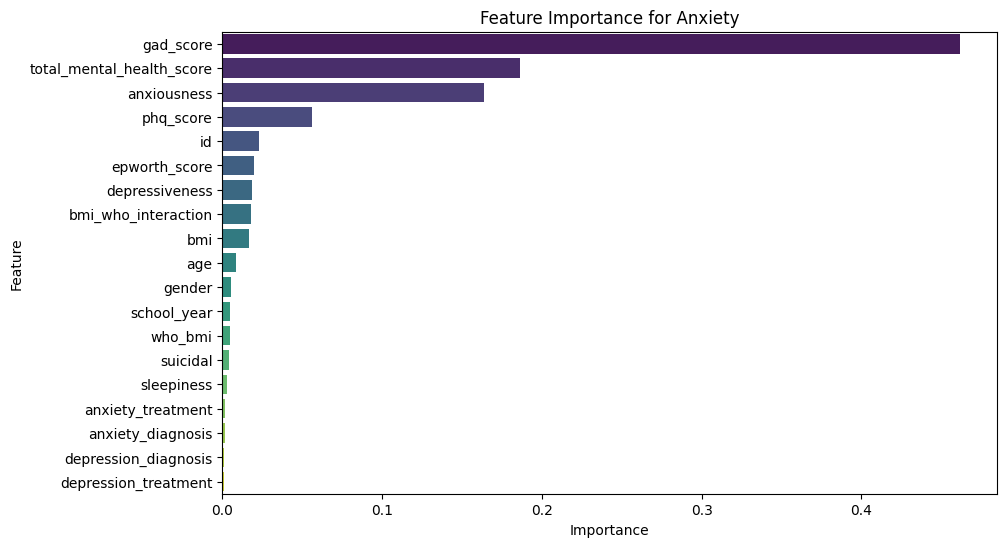


 Feature importance for Depression


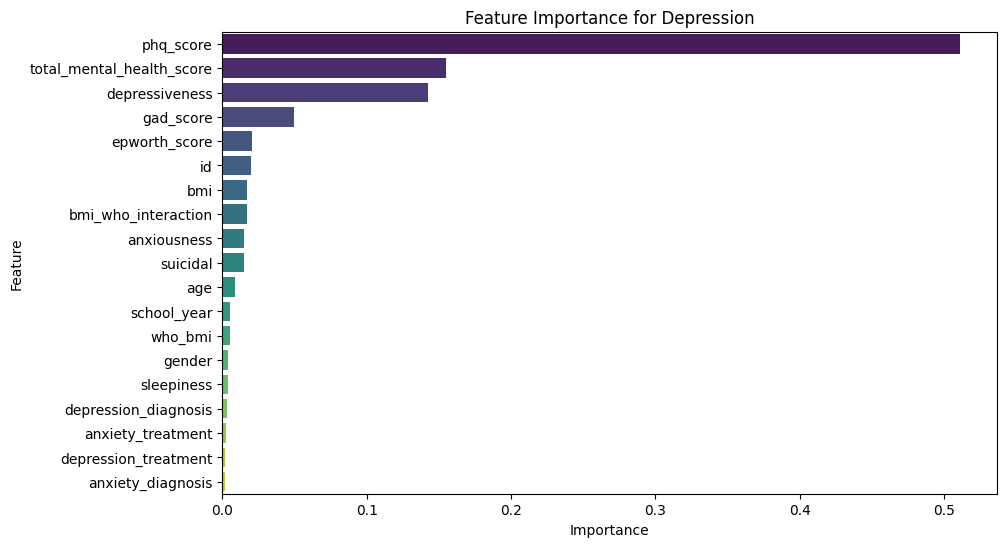

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Separate features and targets
X = data.drop(columns=["depression_severity", "anxiety_severity"])
y_depression = data["depression_severity"]
y_anxiety = data["anxiety_severity"]

# Function to plot feature importance
def plot_feature_importance(importances, title):
    feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})
    feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(title)
    plt.show()

# Train and plot for Anxiety
rf = RandomForestClassifier()
rf.fit(X, y_anxiety)
print("\n Feature importance for Anxiety")
plot_feature_importance(rf.feature_importances_, "Feature Importance for Anxiety")

# Train and plot for Depression
rf = RandomForestClassifier()
rf.fit(X, y_depression)
print("\n Feature importance for Depression")
plot_feature_importance(rf.feature_importances_, "Feature Importance for Depression")

#### Insights:
    Features with high importance scores (e.g., phq_score, gad_score, depressiveness, anxiousness, total_mental_health_score, id, epworth_score) should be selected.
    Also the new features created are also showing significant importance
### Scaling
scaling numerical features to ensure they are on the same scale.

In [13]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = ["age", "bmi", "phq_score", "gad_score", "epworth_score"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Model Development
### Train-Test Split
Split the dataset into training and testing sets.

In [14]:
 from sklearn.model_selection import train_test_split
 # Features and target
 X = data.drop(columns=["depression_severity", "anxiety_severity"])
 y_depression = data["depression_severity"]
 y_anxiety = data["anxiety_severity"]
 # Train-test split
 X_train, X_test, y_train_depression, y_test_depression = train_test_split(X, y_depression, test_size=0.2, random_state=42)
 X_train, X_test, y_train_anxiety, y_test_anxiety = train_test_split(X, y_anxiety, test_size=0.2, random_state=42)

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution
print("Depression Severity Class Distribution:", Counter(y_train_depression))
print("Anxiety Severity Class Distribution:", Counter(y_train_anxiety))

# Apply SMOTE if imbalance exists
smote = SMOTE(random_state=42,sampling_strategy='auto', k_neighbors=2)
X_train_resampled_depression, y_train_resampled_depression = smote.fit_resample(X_train, y_train_depression)
X_train_resampled_anxiety, y_train_resampled_anxiety = smote.fit_resample(X_train, y_train_anxiety)

# Check resampled class distribution
print("Resampled Depression Class Distribution:", Counter(y_train_resampled_depression))
print("Resampled Anxiety Class Distribution:", Counter(y_train_resampled_anxiety))

Depression Severity Class Distribution: Counter({0: 282, 3: 176, 1: 116, 2: 29, 5: 12, 4: 11})
Anxiety Severity Class Distribution: Counter({1: 237, 3: 231, 2: 100, 4: 54, 0: 4})
Resampled Depression Class Distribution: Counter({0: 282, 3: 282, 1: 282, 2: 282, 5: 282, 4: 282})
Resampled Anxiety Class Distribution: Counter({1: 237, 3: 237, 2: 237, 4: 237, 0: 237})


In [27]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression for Depression
logreg_depression = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
logreg_depression.fit(X_train_resampled_depression, y_train_resampled_depression)

# Evaluate Logistic Regression for Depression
y_pred_depression = logreg_depression.predict(X_test)
print("\nLogistic Regression Depression Metrics:")
print("Accuracy:", accuracy_score(y_test_depression, y_pred_depression))
print("Precision:", precision_score(y_test_depression, y_pred_depression, average="weighted"))
print("Recall:", recall_score(y_test_depression, y_pred_depression, average="weighted"))
print("F1-Score:", f1_score(y_test_depression, y_pred_depression, average="weighted"))
print("ROC-AUC:", roc_auc_score(y_test_depression, logreg_depression.predict_proba(X_test), multi_class="ovr"))

# Train Logistic Regression for Anxiety
logreg_anxiety = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
logreg_anxiety.fit(X_train_resampled_anxiety, y_train_resampled_anxiety)

# Evaluate Logistic Regression for Anxiety
y_pred_anxiety = logreg_anxiety.predict(X_test)
print("\nLogistic Regression Anxiety Metrics:")
print("Accuracy:", accuracy_score(y_test_anxiety, y_pred_anxiety))
print("Precision:", precision_score(y_test_anxiety, y_pred_anxiety, average="weighted"))
print("Recall:", recall_score(y_test_anxiety, y_pred_anxiety, average="weighted"))
print("F1-Score:", f1_score(y_test_anxiety, y_pred_anxiety, average="weighted"))
print("ROC-AUC:", roc_auc_score(y_test_anxiety, logreg_anxiety.predict_proba(X_test), multi_class="ovr"))


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Depression Metrics:
Accuracy: 0.8662420382165605
Precision: 0.8752690035674566
Recall: 0.8662420382165605
F1-Score: 0.8697103514742734
ROC-AUC: 0.9765074581509653

Logistic Regression Anxiety Metrics:
Accuracy: 0.89171974522293
Precision: 0.9000142980777871
Recall: 0.89171974522293
F1-Score: 0.8944376471015891
ROC-AUC: 0.9709524578965413


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Neural Network for Depression
mlp_depression = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_depression.fit(X_train_resampled_depression, y_train_resampled_depression)

# Evaluate Neural Network for Depression
y_pred_depression = mlp_depression.predict(X_test)
print("\nMLP Neural Network Depression Metrics:")
print("Accuracy:", accuracy_score(y_test_depression, y_pred_depression))
print("Precision:", precision_score(y_test_depression, y_pred_depression, average="weighted"))
print("Recall:", recall_score(y_test_depression, y_pred_depression, average="weighted"))
print("F1-Score:", f1_score(y_test_depression, y_pred_depression, average="weighted"))
print("ROC-AUC:", roc_auc_score(y_test_depression, mlp_depression.predict_proba(X_test), multi_class="ovr"))

# Train Neural Network for Anxiety
mlp_anxiety = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_anxiety.fit(X_train_resampled_anxiety, y_train_resampled_anxiety)

# Evaluate Neural Network for Anxiety
y_pred_anxiety = mlp_anxiety.predict(X_test)
print("\nMLP Neural Network Anxiety Metrics:")
print("Accuracy:", accuracy_score(y_test_anxiety, y_pred_anxiety))
print("Precision:", precision_score(y_test_anxiety, y_pred_anxiety, average="weighted"))
print("Recall:", recall_score(y_test_anxiety, y_pred_anxiety, average="weighted"))
print("F1-Score:", f1_score(y_test_anxiety, y_pred_anxiety, average="weighted"))
print("ROC-AUC:", roc_auc_score(y_test_anxiety, mlp_anxiety.predict_proba(X_test), multi_class="ovr"))



MLP Neural Network Depression Metrics:
Accuracy: 0.7834394904458599
Precision: 0.7864476723949065
Recall: 0.7834394904458599
F1-Score: 0.7847216512230782
ROC-AUC: 0.9573504470971268

MLP Neural Network Anxiety Metrics:
Accuracy: 0.732484076433121
Precision: 0.8172875237983314
Recall: 0.732484076433121
F1-Score: 0.7682025301078194
ROC-AUC: 0.9131721264472373


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Random Forest for Depression
rf_depression = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_depression.fit(X_train_resampled_depression, y_train_resampled_depression)

# Evaluate Random Forest for Depression
y_pred_depression = rf_depression.predict(X_test)
print("Random Forest Depression Metrics:")
print("Accuracy:", accuracy_score(y_test_depression, y_pred_depression))
print("Precision:", precision_score(y_test_depression, y_pred_depression, average="weighted"))
print("Recall:", recall_score(y_test_depression, y_pred_depression, average="weighted"))
print("F1-Score:", f1_score(y_test_depression, y_pred_depression, average="weighted"))
print("ROC-AUC:", roc_auc_score(y_test_depression, rf_depression.predict_proba(X_test), multi_class="ovr"))

# Train Random Forest for Anxiety
rf_anxiety = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_anxiety.fit(X_train_resampled_anxiety, y_train_resampled_anxiety)

# Evaluate Random Forest for Anxiety
y_pred_anxiety = rf_anxiety.predict(X_test)
print("\n Random Forest Anxiety Metrics:")
print("Accuracy:", accuracy_score(y_test_anxiety, y_pred_anxiety))
print("Precision:", precision_score(y_test_anxiety, y_pred_anxiety, average="weighted"))
print("Recall:", recall_score(y_test_anxiety, y_pred_anxiety, average="weighted"))
print("F1-Score:", f1_score(y_test_anxiety, y_pred_anxiety, average="weighted"))
print("ROC-AUC:", roc_auc_score(y_test_anxiety, rf_anxiety.predict_proba(X_test), multi_class="ovr"))

Random Forest Depression Metrics:
Accuracy: 0.9745222929936306
Precision: 0.9759921607055365
Recall: 0.9745222929936306
F1-Score: 0.9737099217573936
ROC-AUC: 0.9998587547929653

 Random Forest Anxiety Metrics:
Accuracy: 0.9872611464968153
Precision: 0.97498552403011
Recall: 0.9872611464968153
F1-Score: 0.9810096720924747
ROC-AUC: 0.9983286904817643


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


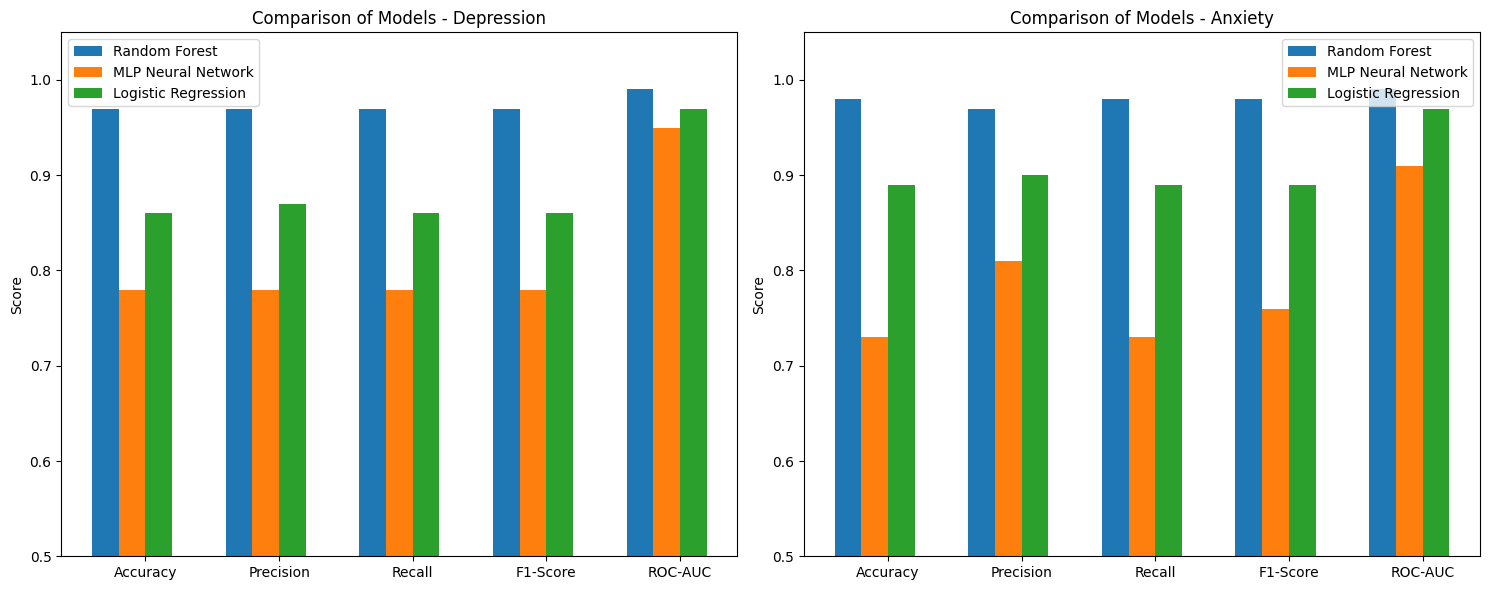

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and metrics
models = ["Random Forest",  "MLP Neural Network", "Logistic Regression"]
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

# Results
results_depression = [
    [0.97, 0.97, 0.97, 0.97, 0.99],  # Random Forest Depression
    [0.78, 0.78, 0.78, 0.78, 0.95],  # MLP Neural Network Depression
    [0.86, 0.87, 0.86, 0.86, 0.97],  # Logistic Regression Depression
]

results_anxiety = [
    [0.98, 0.97, 0.98, 0.98, 0.99],  # Random Forest Anxiety
    [0.73, 0.81, 0.73, 0.76, 0.91],  # MLP Neural Network Anxiety
    [0.89, 0.90, 0.89, 0.89, 0.97],  # Logistic Regression Anxiety
]

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
bar_width = 0.2
x = np.arange(len(metrics))

# Depression Plot
for i, model in enumerate(models):
    axes[0].bar(x + i * bar_width, results_depression[i], width=bar_width, label=model)

axes[0].set_title("Comparison of Models - Depression")
axes[0].set_xticks(x + bar_width * 1.5)
axes[0].set_xticklabels(metrics)
axes[0].set_ylim(0.5, 1.05)
axes[0].legend()
axes[0].set_ylabel("Score")

# Anxiety Plot
for i, model in enumerate(models):
    axes[1].bar(x + i * bar_width, results_anxiety[i], width=bar_width, label=model)

axes[1].set_title("Comparison of Models - Anxiety")
axes[1].set_xticks(x + bar_width * 1.5)
axes[1].set_xticklabels(metrics)
axes[1].set_ylim(0.5, 1.05)
axes[1].legend()
axes[1].set_ylabel("Score")

plt.tight_layout()
plt.show()


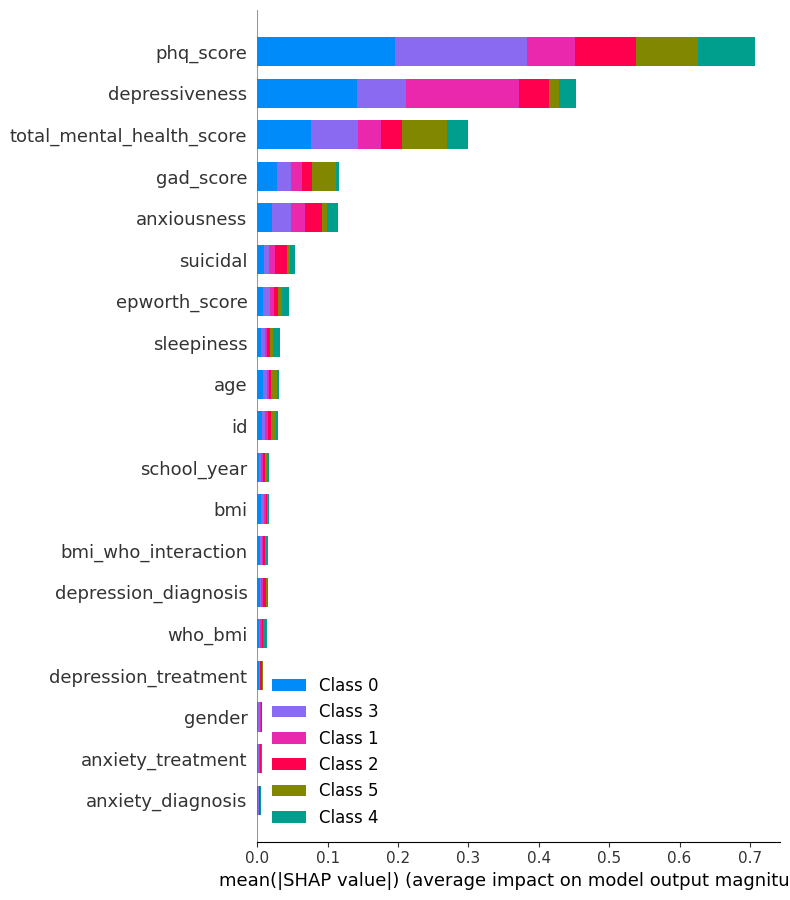

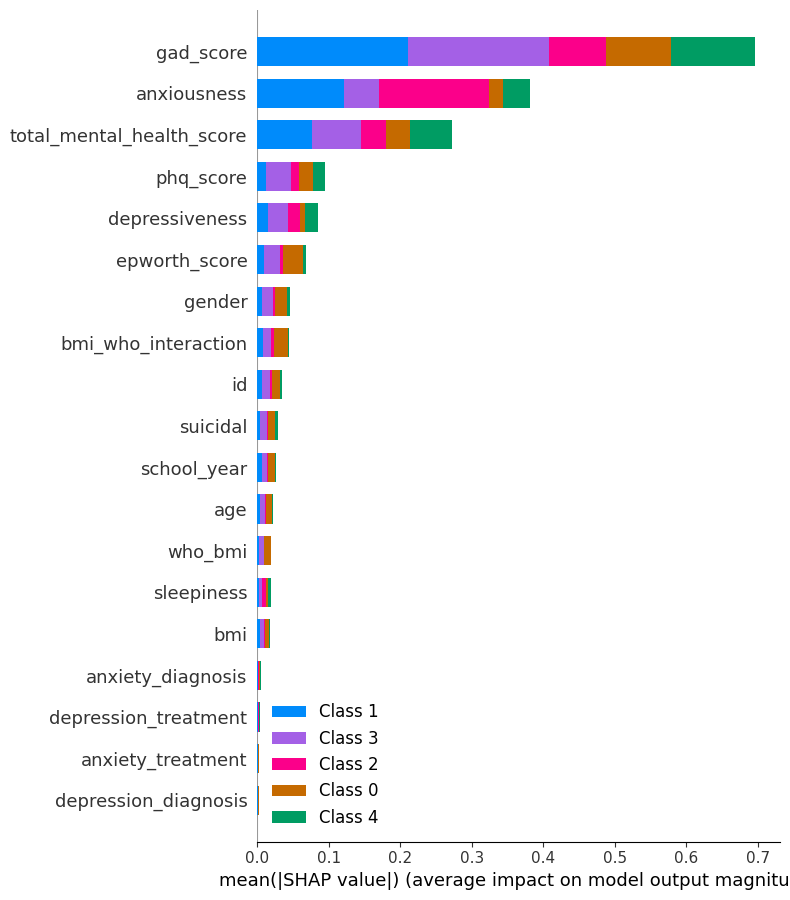

In [30]:
import shap

# SHAP for Random Forest (Depression)
explainer = shap.TreeExplainer(rf_depression)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# SHAP for XGBoost (Anxiety)
explainer = shap.TreeExplainer(rf_anxiety)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

#### Analysis of SHAP Visualization for Random Forest

The SHAP (SHapley Additive exPlanations) visualizations elucidate the influence of various features on the model's predictions across distinct classes. The primary insights derived from the SHAP plots are as follows:

Principal Contributing Features

    The PHQ Score, Depressiveness, Total Mental Health Score, and GAD Score emerge as the most significant features in forecasting mental health outcomes.
    Anxiousness and Suicidal tendencies also exert a considerable influence on the classification process.
    The ePworth Score, which pertains to sleepiness, along with the interaction between BMI and WHO classifications, has a moderate effect on the predictions.

Class-Specific Contributions

    The contribution of features varies across different classes. The PHQ score demonstrates the highest influence across all classes, indicating its status as the most vital predictor.
    Additionally, the GAD score and levels of anxiousness are essential in differentiating between various severity levels.

### Model Choice - Justification
Random Forest is identified as the optimal model for classification based on the results presented, owing to its consistently high metrics in accuracy, precision, recall, F1-score, and ROC-AUC. These performance indicators demonstrate the model's capability to effectively distinguish between classes while achieving a commendable equilibrium between sensitivity and specificity. Furthermore, Random Forest is adept at managing imbalanced datasets, leveraging its intrinsic feature importance and ensemble learning techniques to mitigate bias and variance. In contrast to Neural Networks, Random Forest exhibits a lower tendency to overfit when appropriately calibrated, thereby enhancing its generalization across diverse datasets.

In terms of stability and generalization, Random Forest delivers reliable performance without necessitating extensive hyperparameter adjustments or large data volumes, which are often prerequisites for Neural Networks. Additionally, it proficiently addresses class imbalance, particularly when employing class_weight="balanced", thereby ensuring equitable representation of minority classes in its predictions.

Another significant benefit of Random Forest lies in its interpretability and computational efficiency. Unlike Neural Networks, which operate as opaque models, Random Forest facilitates the analysis of feature importance, thereby clarifying the elements that influence its predictions. Moreover, it is considerably less resource-intensive than deep learning architectures, rendering it a pragmatic option for implementation in practical applications.

Taking into account the interplay between performance, interpretability, and computational efficiency, Random Forest stands out as the most appropriate model. It not only surpasses Logistic Regression in performance but also matches or exceeds the efficacy of Neural Networks without the intricacies and computational demands typically associated with deep learning.

In [31]:
import joblib

# Save rf_depression Model
joblib.dump(rf_depression, "rf_depression_model.pkl")
joblib.dump(rf_anxiety, "rf_anxiety_model.pkl")

['rf_anxiety_model.pkl']